In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
jan_data = pd.read_csv("datasets/sales/january.csv")
jan_data["Month"] = "Jan"
feb_data = pd.read_csv("datasets/sales/february.csv")
feb_data["Month"] = "Feb"
mar_data = pd.read_csv("datasets/sales/march.csv")
mar_data["Month"] = "Mar"
apr_data = pd.read_csv("datasets/sales/april.csv")
apr_data["Month"] = "Apr"
may_data = pd.read_csv("datasets/sales/may.csv")
may_data["Month"] = "May"
jun_data = pd.read_csv("datasets/sales/june.csv")
jun_data["Month"] = "Jun"
jul_data = pd.read_csv("datasets/sales/july.csv")
jul_data["Month"] = "Jul"
aug_data = pd.read_csv("datasets/sales/august.csv")
aug_data["Month"] = "Aug"
sep_data = pd.read_csv("datasets/sales/september.csv")
sep_data["Month"] = "Sep"
oct_data = pd.read_csv("datasets/sales/october.csv")
oct_data["Month"] = "Oct"
nov_data = pd.read_csv("datasets/sales/november.csv")
nov_data["Month"] = "Nov"
dec_data = pd.read_csv("datasets/sales/december.csv")
dec_data["Month"] = "Dec"

In [316]:
data = [jan_data, feb_data, mar_data, apr_data, may_data, jun_data, jul_data, aug_data, sep_data, oct_data, nov_data, dec_data]

for df in data:
  print(df.shape)

(9723, 7)
(12036, 7)
(15226, 7)
(18383, 7)
(16635, 7)
(13622, 7)
(14371, 7)
(12011, 7)
(11686, 7)
(20379, 7)
(17661, 7)
(25117, 7)


In [317]:
data = pd.concat(data, ignore_index = True)

data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
122508,258227,AA Batteries (4-pack),1,3.84,09/10/19 14:49,"660 River St, Boston, MA 02215",Sep
166015,299736,Macbook Pro Laptop,1,1700,12/12/19 07:23,"929 2nd St, New York City, NY 10001",Dec
136352,271441,Wired Headphones,1,11.99,10/18/19 20:38,"109 Main St, Los Angeles, CA 90001",Oct
46302,185452,USB-C Charging Cable,1,11.95,04/04/19 00:49,"490 5th St, Atlanta, GA 30301",Apr
136105,271205,AA Batteries (4-pack),2,3.84,10/08/19 09:44,"882 Elm St, San Francisco, CA 94016",Oct
157434,291564,Wired Headphones,1,11.99,11/26/19 19:47,"572 Spruce St, Portland, OR 97035",Nov
155298,289518,Apple Airpods Headphones,1,150,11/13/19 14:09,"566 Jackson St, San Francisco, CA 94016",Nov
67800,205913,Lightning Charging Cable,1,14.95,05/17/19 20:25,"939 4th St, Austin, TX 73301",May
177495,310726,Bose SoundSport Headphones,1,99.99,12/16/19 11:31,"184 Main St, Los Angeles, CA 90001",Dec
95242,232109,Apple Airpods Headphones,1,150,07/19/19 09:42,"527 Adams St, Los Angeles, CA 90001",Jul


#### Data discovery

In [318]:
# month non-null values are more than other columns
# quantity ordered data type is object and it should be number
# price each data type is object and it should be float

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186850 non-null  object
dtypes: object(7)
memory usage: 10.0+ MB


In [319]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month                 0
dtype: int64

In [320]:
# dataset have duplicated rows

data.duplicated().sum()

1140

In [321]:
data.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
Month                   12
dtype: int64

In [322]:
data["Product"].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [323]:
data["Quantity Ordered"].unique()

array(['1', '2', '3', '5', '4', nan, '7', 'Quantity Ordered', '6', '9',
       '8'], dtype=object)

In [324]:
data["Price Each"].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', nan, 'Price Each', '700.0', '150.0',
       '300.0', '1700.0', '400.0'], dtype=object)

#### Lower and replace spaces in column names

In [325]:
data.columns = [column.lower().replace(" ", "_") for column in data]

data.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address', 'month'],
      dtype='object')

#### Date cleaning

In [326]:
# if we have a large dataset we can remove rows with null values if they represent a little percentage.
# otherwise replace null values with mean

(data.isnull().sum().sum()) / len(data) * 100

# 1.7% is a low percent

1.75006689858175

In [327]:
# drop rows with null values

data = data.dropna()

data.isnull().sum()

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
month               0
dtype: int64

In [328]:
# adjust data type of quantity ordered and price each columns

# data = data.astype({
#   "quantity_ordered": int,
#   "price_each": float
# })

# will throw error becuase columns contain non numerice data

In [329]:
data = data.drop(data[data.quantity_ordered == "Quantity Ordered"].index)
data = data.drop(data[data.price_each == "Price Each"].index)

In [330]:
data = data.astype({
  "quantity_ordered": int,
  "price_each": float
})

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          185950 non-null  object 
 1   product           185950 non-null  object 
 2   quantity_ordered  185950 non-null  int32  
 3   price_each        185950 non-null  float64
 4   order_date        185950 non-null  object 
 5   purchase_address  185950 non-null  object 
 6   month             185950 non-null  object 
dtypes: float64(1), int32(1), object(5)
memory usage: 10.6+ MB


#### Date Analyze

##### Get sales per month

In [331]:
# calculate total per order

data["total"] = data["quantity_ordered"] * data["price_each"]

data.sample(5)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total
32566,172335,Wired Headphones,1,11.99,03/30/19 00:20,"163 Hill St, Atlanta, GA 30301",Mar,11.99
44932,184145,USB-C Charging Cable,1,11.95,04/16/19 13:33,"253 Park St, Boston, MA 02215",Apr,11.95
114550,250591,USB-C Charging Cable,1,11.95,09/15/19 18:56,"477 Johnson St, New York City, NY 10001",Sep,11.95
40621,180042,AA Batteries (4-pack),2,3.84,04/12/19 08:04,"987 10th St, San Francisco, CA 94016",Apr,7.68
103523,240060,Apple Airpods Headphones,1,150.00,08/30/19 22:17,"304 Pine St, Los Angeles, CA 90001",Aug,150.00


In [332]:
monthly_sales_data = data.groupby("month")["total"].agg(total_sum = "sum").sort_values(by = "total_sum", ascending = False).reset_index()

monthly_sales_data

,month,total_sum
0,Dec,4619297.12
1,Oct,3736884.05
2,Apr,3396059.11
3,Nov,3198909.23
4,May,3144584.80
5,Mar,2809063.30
6,Jul,2646899.69
7,Jun,2578293.30
8,Aug,2244412.31
9,Feb,2203481.24


[Text(0, 0, '4.6193e+06'),
 Text(0, 0, '3.73688e+06'),
 Text(0, 0, '3.39606e+06'),
 Text(0, 0, '3.19891e+06'),
 Text(0, 0, '3.14458e+06'),
 Text(0, 0, '2.80906e+06'),
 Text(0, 0, '2.6469e+06'),
 Text(0, 0, '2.57829e+06'),
 Text(0, 0, '2.24441e+06'),
 Text(0, 0, '2.20348e+06'),
 Text(0, 0, '2.09882e+06'),
 Text(0, 0, '1.81534e+06')]

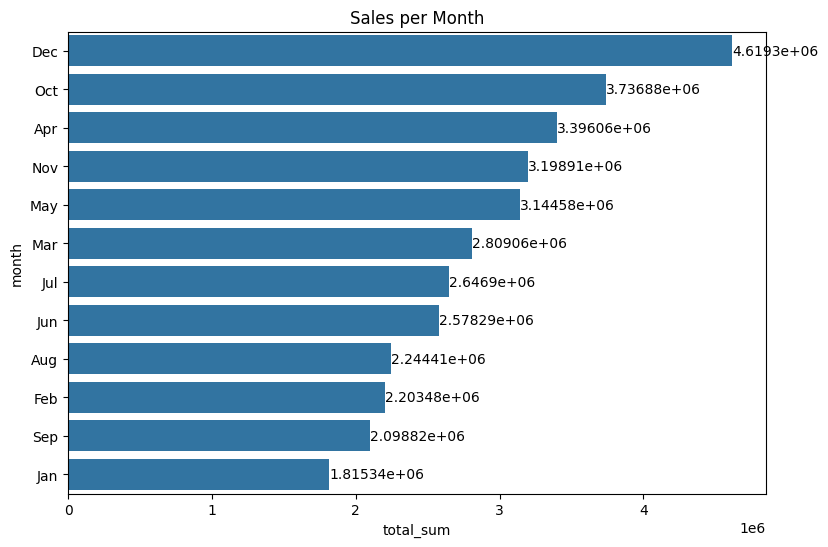

In [333]:
figure, axes = plt.subplots(figsize = (9, 6))

plt.title("Sales per Month")
axis = sns.barplot(data = monthly_sales_data, x = "total_sum", y = "month")
axis.bar_label(axis.containers[0])

##### Get sales per state

In [334]:
# get state name from purchase_address

def get_state(address):
  return address.split(",")[1].strip(" ")

data["state"] = data["purchase_address"].apply(lambda x: get_state(x))

data.sample(5)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total,state
45311,184511,Wired Headphones,2,11.99,04/21/19 16:57,"560 Washington St, San Francisco, CA 94016",Apr,23.98,San Francisco
72787,210672,AA Batteries (4-pack),1,3.84,06/21/19 10:15,"944 1st St, New York City, NY 10001",Jun,3.84,New York City
158146,292247,Lightning Charging Cable,1,14.95,11/13/19 23:43,"67 7th St, Boston, MA 02215",Nov,14.95,Boston
161411,295353,Wired Headphones,1,11.99,11/17/19 13:51,"115 Lake St, Boston, MA 02215",Nov,11.99,Boston
21611,161869,USB-C Charging Cable,1,11.95,02/09/19 11:15,"79 Forest St, Los Angeles, CA 90001",Feb,11.95,Los Angeles


In [335]:
state_sales_data = data.groupby("state")["total"].sum().sort_values(ascending = False).reset_index()

state_sales_data

,state,total
0,San Francisco,8262203.91
1,Los Angeles,5452570.80
2,New York City,4664317.43
3,Boston,3661642.01
4,Atlanta,2795498.58
5,Dallas,2767975.40
6,Seattle,2747755.48
7,Portland,2320490.61
8,Austin,1819581.75


[Text(0, 0, '8.2622e+06'),
 Text(0, 0, '5.45257e+06'),
 Text(0, 0, '4.66432e+06'),
 Text(0, 0, '3.66164e+06'),
 Text(0, 0, '2.7955e+06'),
 Text(0, 0, '2.76798e+06'),
 Text(0, 0, '2.74776e+06'),
 Text(0, 0, '2.32049e+06'),
 Text(0, 0, '1.81958e+06')]

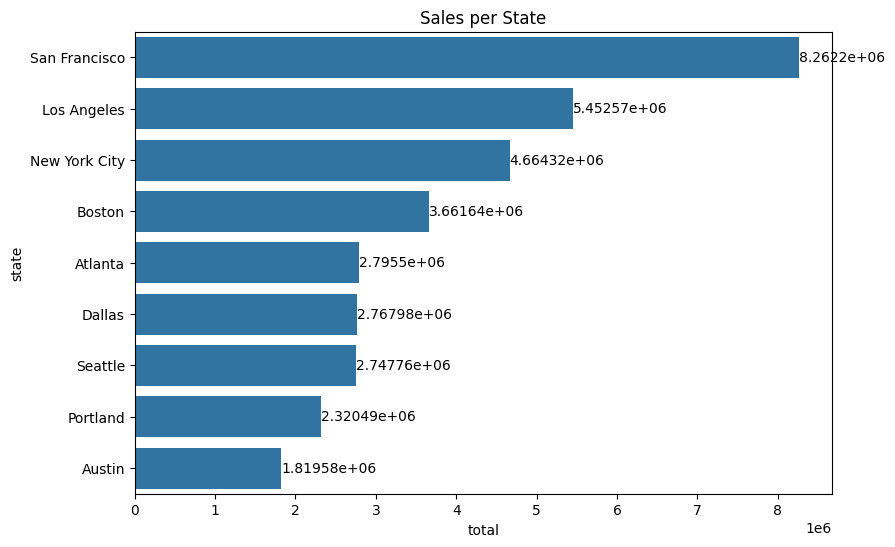

In [336]:
figure, axes = plt.subplots(figsize = (9, 6))

plt.title("Sales per State")
axis = sns.barplot(data = state_sales_data, x = "total", y = "state")
axis.bar_label(axis.containers[0])

##### Get most sold product

In [337]:
product_sales_data = data.groupby("product")["quantity_ordered"].sum().sort_values(ascending = False).reset_index()

product_sales_data

,product,quantity_ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


[Text(0, 0, '31017'),
 Text(0, 0, '27635'),
 Text(0, 0, '23975'),
 Text(0, 0, '23217'),
 Text(0, 0, '20557'),
 Text(0, 0, '15661'),
 Text(0, 0, '13457'),
 Text(0, 0, '7550'),
 Text(0, 0, '6849'),
 Text(0, 0, '6244'),
 Text(0, 0, '6199'),
 Text(0, 0, '5532'),
 Text(0, 0, '4819'),
 Text(0, 0, '4728'),
 Text(0, 0, '4130'),
 Text(0, 0, '4129'),
 Text(0, 0, '2068'),
 Text(0, 0, '666'),
 Text(0, 0, '646')]

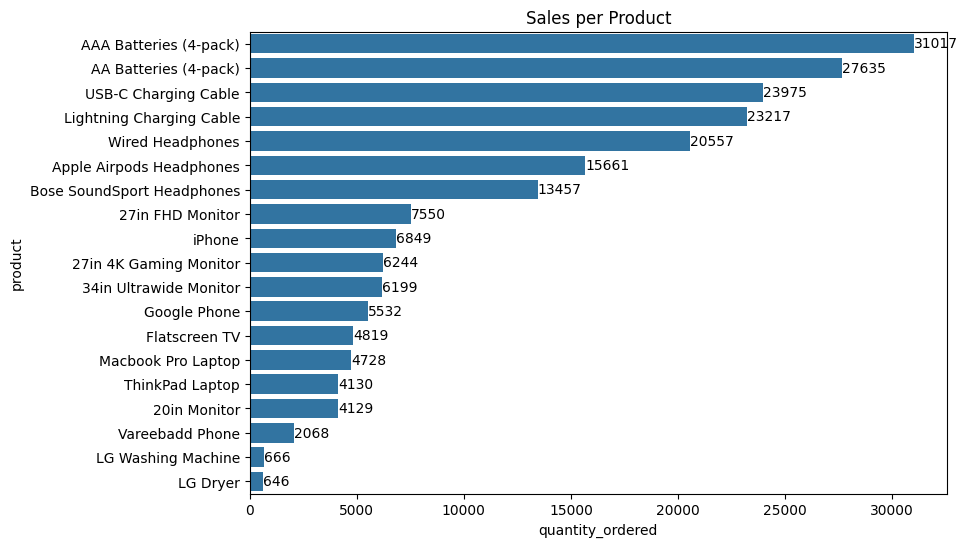

In [338]:
figure, axes = plt.subplots(figsize = (9, 6))

plt.title("Sales per Product")
axis = sns.barplot(data = product_sales_data, x = "quantity_ordered", y = "product")
axis.bar_label(axis.containers[0])

##### Get best time to sale

In [339]:
# add time column

sale_times = []
for sale in data["order_date"]:
  sale_times.append(sale.split(" ")[1])

data["time"] = sale_times

data.sample(5)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,total,state,time
110065,246298,iPhone,1,700.00,08/03/19 17:24,"212 12th St, Boston, MA 02215",Aug,700.00,Boston,17:24
79812,217363,AAA Batteries (4-pack),1,2.99,06/01/19 16:14,"640 Sunset St, Portland, ME 04101",Jun,2.99,Portland,16:14
128916,264335,Apple Airpods Headphones,1,150.00,10/31/19 03:58,"256 Willow St, Portland, OR 97035",Oct,150.00,Portland,03:58
134047,269245,Wired Headphones,1,11.99,10/18/19 07:50,"952 14th St, San Francisco, CA 94016",Oct,11.99,San Francisco,07:50
120338,256141,AAA Batteries (4-pack),2,2.99,09/11/19 09:43,"946 Hickory St, Boston, MA 02215",Sep,5.98,Boston,09:43


In [340]:
time_sales_data = data.groupby("time")[["quantity_ordered", "total"]].sum().sort_values(by = "total", ascending = False).reset_index()

time_sales_data

,time,quantity_ordered,total
0,19:01,269,54503.14
1,12:21,270,54181.96
2,19:16,239,54156.39
3,20:13,269,53149.51
4,19:20,281,52903.41
...,...,...,...
1435,02:50,12,381.99
1436,03:57,11,317.63
1437,04:05,5,277.72
1438,03:59,10,177.29


[Text(0, 0, '269'),
 Text(0, 0, '270'),
 Text(0, 0, '239'),
 Text(0, 0, '269'),
 Text(0, 0, '281')]

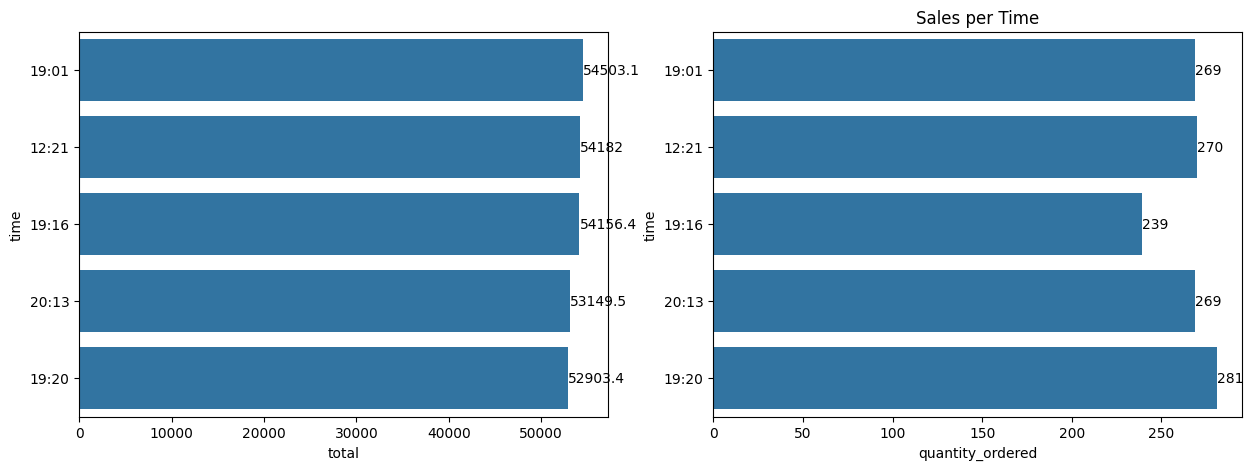

In [341]:
figure, axes = plt.subplots(1, 2, figsize = (15, 5))

plt.title("Sales per Time")
ax1 = sns.barplot(data = time_sales_data.head(), x = "total", y = "time", ax = axes[0])
ax1.bar_label(ax1.containers[0])

ax2 = sns.barplot(data = time_sales_data.head(), x = "quantity_ordered", y = "time", ax = axes[1])
ax2.bar_label(ax2.containers[0])